In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train.csv',on_bad_lines='skip',engine='python')

In [ ]:
df = df.sample(30000,random_state=2)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
10281,10281,19941,19942,When will a custom rom be released for the Mot...,Need help to plan North India trip on year end...,0
2186,2186,4349,4350,What matters at the end most?,"What matters at the end of the day, week, mont...",1
29495,29495,54565,54566,What is the current public perception of the C...,How do the Chinese view the Cultural Revolution?,1
48369,48369,52560,86258,How do you make an LLC?,How can I set up an LLC?,1
47148,47148,84214,25072,What is a suitable inpatient drug and alcohol ...,Which is a suitable inpatient drug and alcohol...,0


In [ ]:
def preprocess(q):

  # lowercasing and stripping
  q = str(q).lower().strip()

  # Replacing certain special characters with their string equivalents
  q = q.replace('%','percent')
  q = q.replace('$','doller')
  q = q.replace('₹','rupee')
  q = q.replace('€','euro')
  q = q.replace('@','at')

  # The pattern ['math'] appear around 900 times in the whole dataset
  q = q.replace('[maths]','')

  # Replacing some number with string equivalents
  q = q.replace(',000,000,000 ','b')
  q = q.replace(',000,000,','m')
  q = q.replace(',000','k')
  q = q.replace(',000,000,000 ','b')
  q = re.sub(r'([0-9]+)000000000 ',r'\1b',q)
  q = re.sub(r'([0-9]+)000000 ',r'\1m',q)
  q = re.sub(r'([0-9]+)000 ',r'\1k',q)

  # decontracting words
  # removing shorthands

  contractions ={
      "ain't": "am not",
      "aren't": "are not",
      "can't": "can not",
      "can't've": "can not have",
      "cause": "because",
      "could've": "could have",
      "couldn't": "could not",
      "couldn't've": "could not have",
      "didn't": "did not",
      "doesn't": "does not",
      "don't": "do not",
      "hadn't": "had not",
      "hadn't've": "had not have",
      "hasn't": "has not",
      "haven't": "have not",
      "he'd": "he would",
      "he'd've": "he would have",
      "he'll": "he will",
      "he'll've": "he will have",
      "he's": "he is",
      "how'd": "how did",
      "how'd'y": "how do you",
      "how'll": "how will",
      "how's": "how is",
      "i'd": "i would",
      "i'd've": "i would have",
      "i'll": "i will",
      "i'll've": "i will have",
      "it's": "it is",
      "it'd": "it would",
      "it'd've": "it would have",
      "let's": "let us",
      "ma'am": "madam",
      "mayn't": "may not",
      "might've": "might have",
      "mightn't": "might not",
      "mightn't've": "might not have",
      "must've": "must have",
      "mustn't": "must not",
      "mustn't've": "must",
      "needn't": "need not",
      "needn't've": "need not have",
      "o'clock": "of the clock",
      "oughtn't": "ought not",
      "shan't": "shall not",
      "sha'n't": "shall not",
      "shan't've": "shall not have",
      "she'd": "she would",
      "she'd've": "she would have",
      "she'll": "she will",
      "she'll've": "she will have",
      "she's": "she is",
      "should've": "should have",
      "shouldn't": "should not",
      "shouldn't've": "should not have",
      "so've": "so have",
      "so's": "so as",
      "that'd": "that would",
      "that'd've": "that would have",
      "there'd": "there would",
      "there'd've": "there would have",
      "there's": "there is",
      "they'd": "they would",
      "they'd've": "they would have",
      "they'll": "they will",
      "they'll've": "they will have",
      "they're": "they are",
      "they've": "they have",
      "to've": "to have",
      "wasn't": "was not",
      "we'd": "we would",
      "we'd've": "we would have",
      "we'll": "we will",
      "we'll've": "we will have",
      "we're": "we are",
      "we've": "we have",
      "weren't": "were not",
      "what'll": "what will",
      "what'll've": "what will have",
      "what're": "what are",
      "what's": "what is",
      "what've": "what have",
      "when's": "when is",
      "when've": "when have",
      "where'd": "where did",
      "where's": "where is",
      "where've": "where have",
      "who'll": "who will",
      "who'll've": "who will have",
      "who's": "who is",
      "who've": "who have",
      "why's": "why is",
      "why've": "why have",
      "will've": "will have",
      "won't": "will not",
      "won't've": "will not have",
      "would've": "would have",
      "wouldn't": "would not",
      "wouldn't've": "would not have",
      "y'all": "you all",
      "y'all'd": "you all would",
      "y'all'd've": "you all would have",
      "y'all're": "you all are",
      "y'all've": "you all have",
      "you'd": "you would",
      "you'd've": "you would have",
      "you'll": "you will",
      "you'll've": "you will have",
      "you're": "you are",
      "you've": "you have"

  }

  q_decontracted = []

  for word in q.split():
    if word in contractions:
      word = contractions[word]

    q_decontracted.append(word)

  q = ' '.join(q_decontracted)
  q = q.replace("'ve"," have")
  q = q.replace("n't","not")
  q = q.replace("'re","are")
  q = q.replace("'ll","will")

 # Removing Html tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern,' ', q).strip()

  return q

In [ ]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [ ]:
#applying preprocess on question1 and question2
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0


In [ ]:
# now creating seven features
#1. length of ques1
#2. length of ques2
#3. words in ques1
#4. words in ques2
#5. common uniques words in ques1 and ques2
#6. Total words i nques1 and ques2
#7. word share

In [ ]:
# finding length of ques1 and ques2
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
# finding words of ques1 and ques2
df['q1_words'] = df['question1'].apply(lambda row : len(row.split()))
df['q2_words'] = df['question2'].apply(lambda row : len(row.split()))

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14
...,...,...,...,...,...,...,...,...,...,...
22030,22030,41398,41399,how can i get others phone mac address,how would i know my phone mac address is block,0,39,46,8,10
28259,28259,52420,51687,stephen hsu physicist what does stephen hsu...,stephen hsu physicist what does stephen hsu...,0,60,61,10,10
17281,17281,32859,32860,what are some mind blowing camping tools that ...,what are some mind blowing camping tools,1,86,40,16,7
4866,4866,9604,9605,who colonized china when,why did not china colonized africa like the eu...,0,25,53,4,9


In [ ]:
# common words
def common_words(row):
  w1 = set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
  w2 =set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
df['common_words'] = df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29,0
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13,5
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8,4
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7,3
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14,12


In [ ]:
# Total number of words
def total_words(row):
  w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
df['total_words'] = df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29,0,40
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13,5,19
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8,4,19
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7,3,13
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14,12,28


In [ ]:
# word share
df['word_share'] = round(df['common_words']/ df['total_words'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29,0,40,0.00
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13,5,19,0.26
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8,4,19,0.21
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7,3,13,0.23
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14,12,28,0.43


#Advance Token Features

**Token Features**

In [ ]:
# Advance features
#1.cwc_min
#2.cwc_max
#3.csc_min
#4.csc_max
#5.ctc_min
#6.ctc_max
#7.last_word_eq
#8.first_word_eq

In [ ]:
# Advance features
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

def fetch_token_fatures(row):
  q1 = row['question1']
  q2 = row['question2']

  SAFE_DIV = 0.0001
  token_features = [0.0]*8

  # converting the sentence into tokens
  q1_token  = q1.split()
  q2_token = q2.split()

  if len(q1_token)==0 or len(q2_token) ==0:
    return token_features

  # get the non-stopwords in questions
  q1_words = set(word for word in q1_token if word not in stopwords)
  q2_words = set(word for word in q2_token if word not in stopwords)

  # get the stopwords in questions
  q1_stops = set(word for word in q1_token if word in stopwords)
  q2_stops = set(word for word in q2_token if word in stopwords)

  # get the common no-stopwords from question pairs
  common_word_count = len(q1_words.intersection(q2_words))

  # get the common stopwords from question pairs
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # get the common tokens from question pairs
  common_token_count = len(set(q1_token).intersection(set(q2_token))) # Corrected line

  token_features[0] = common_token_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV)
  token_features[1] = common_token_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV)
  token_features[2] = common_token_count / (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  token_features[3] = common_token_count / (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  token_features[4] = common_token_count / (min(len(q1_token),len(q2_token)) + SAFE_DIV)
  token_features[5] = common_token_count / (max(len(q1_token),len(q2_token)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_token[-1] == q2_token[-1])

  # First word of both question is same or not
  token_features[7] = int(q1_token[0] == q2_token[0])

  return token_features

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
token_features = df.apply(fetch_token_fatures,axis=1)

df['cwc_min']        =   list(map(lambda x : x[0], token_features))
df['cwc_max']        =   list(map(lambda x : x[1], token_features))
df['csc_min']        =   list(map(lambda x : x[2], token_features))
df['csc_max']        =   list(map(lambda x : x[3], token_features))
df['ctc_min']        =   list(map(lambda x : x[4], token_features))
df['ctc_max']        =   list(map(lambda x : x[5], token_features))
df['last_word_eq']   =   list(map(lambda x : x[6], token_features))
df['first_word_eq']  =   list(map(lambda x : x[7], token_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29,...,40,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13,...,19,0.26,2.499875,0.714276,1.249969,0.999980,0.833319,0.384612,0.0,1.0
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8,...,19,0.21,0.999975,0.499994,1.333289,0.999975,0.499994,0.307690,0.0,0.0
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7,...,13,0.23,1.499925,1.499925,0.749981,0.599988,0.499992,0.428565,1.0,1.0
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14,...,28,0.43,1.199988,1.199988,2.999925,2.999925,0.857137,0.857137,1.0,0.0


**Length Based Features**

In [ ]:
!pip install distance
import distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=30e7e0cada043a61039e120388bc453782ae2a55fbd38e6e53608f6a1e1ba518
  Stored in directory: /root/.cache/pip/wheels/24/a8/58/407063d8e5c1d4dd6594c99d12baa0108570b56a92325587dd
Successfully built distance


In [ ]:
def fetch_length_features(row):

  q1 = row['question1']
  q2 = row['question2']

  # length feature
  length_features = [0.0]*3

  # converting sentence into token
  q1_token = q1.split()
  q2_token = q2.split()

  if len(q1_token) == 0 or len(q2_token) == 0:
    return length_features

  # Absolute length feature
  length_features[0] = abs(len(q1_token) - len(q2_token))

  # Average Token length of both questions
  length_features[1] = (len(q1_token) + len(q2_token))/2

  strs = list(distance.lcsubstrings(q1,q2))
  length_features[2] = len(strs[0]) / (min(len(q1),len(q2))+1)

  return length_features

In [ ]:
length_features = df.apply(fetch_length_features,axis=1)
df['abs_len_diff']          = list(map(lambda x : x[0],length_features))
df['avg_len']               = list(map(lambda x : x[1],length_features))
df['longest_substr_ration'] = list(map(lambda x : x[2],length_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,avg_len,longest_substr_ration
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,20.5,0.051724
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13,...,0.714276,1.249969,0.999980,0.833319,0.384612,0.0,1.0,7.0,9.5,0.827586
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8,...,0.499994,1.333289,0.999975,0.499994,0.307690,0.0,0.0,5.0,10.5,0.500000
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7,...,1.499925,0.749981,0.599988,0.499992,0.428565,1.0,1.0,1.0,6.5,0.304348
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14,...,1.199988,2.999925,2.999925,0.857137,0.857137,1.0,0.0,0.0,14.0,0.740741


**Fuzzy Features**

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
  q1 = row['question1']
  q2 = row['question2']

  fuzzy_features = [0.0]*4

  # fuzzy ratio
  fuzzy_features[0] = fuzz.QRatio(q1,q2)

  # fuzzy_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features,axis=1)

df['fuzzy_ratio']          = list(map(lambda x : x[0],fuzzy_features))
df['fuzzy_partial_ratio']  = list(map(lambda x : x[1],fuzzy_features))
df['token_sort_ratio']     = list(map(lambda x : x[2],fuzzy_features))
df['token_set_ratio']      = list(map(lambda x : x[3],fuzzy_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,avg_len,longest_substr_ration,fuzzy_ratio,fuzzy_partial_ratio,token_sort_ratio,token_set_ratio
10281,10281,19941,19942,when will a custom rom be released for the mot...,need help to plan north india trip on year end...,0,57,143,12,29,...,0.000000,0.0,0.0,17.0,20.5,0.051724,23,33,17,18
2186,2186,4349,4350,what matters at the end most,what matters at the end of the day week mont...,1,28,62,6,13,...,0.384612,0.0,1.0,7.0,9.5,0.827586,60,93,62,90
29495,29495,54565,54566,what is the current public perception of the c...,how do the chinese view the cultural revolution,1,85,47,13,8,...,0.307690,0.0,0.0,5.0,10.5,0.500000,55,57,61,84
48369,48369,52560,86258,how do you make an llc,how can i set up an llc,1,22,23,6,7,...,0.428565,1.0,1.0,1.0,6.5,0.304348,58,55,67,67
47148,47148,84214,25072,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...,0,80,80,14,14,...,0.857137,1.0,0.0,0.0,14.0,0.740741,90,90,89,92


**Visualizing**

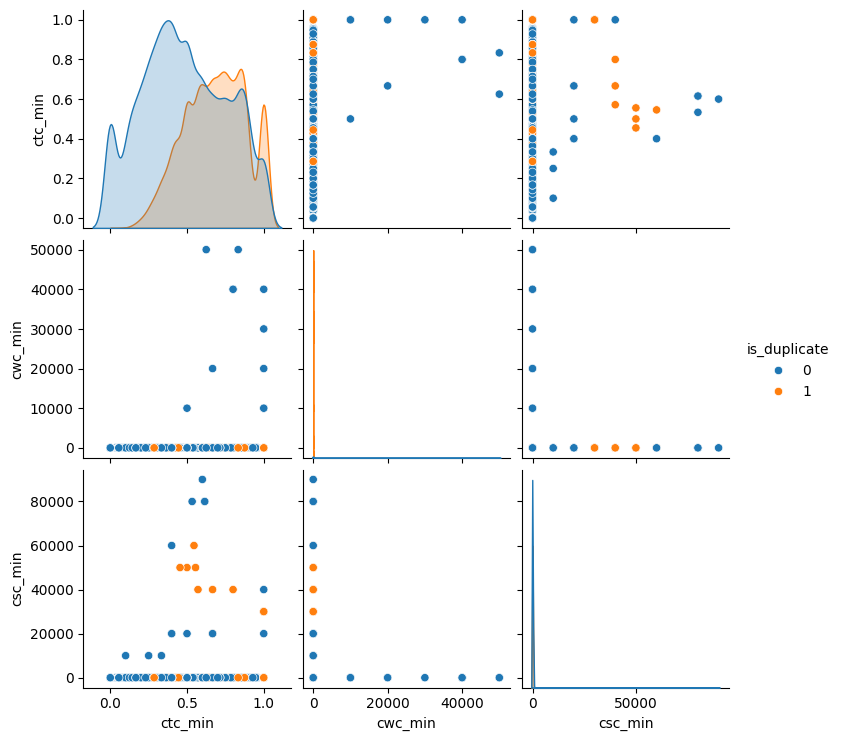

In [ ]:
sns.pairplot(df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

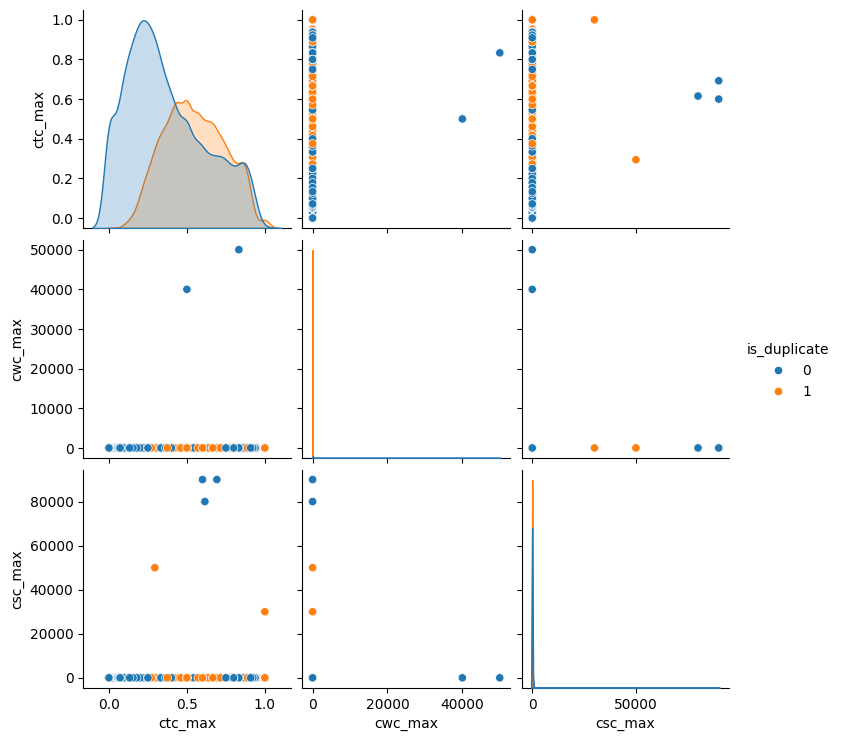

In [ ]:
sns.pairplot(df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

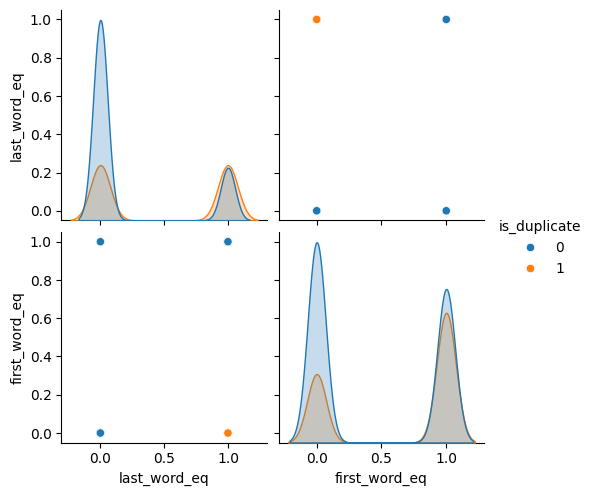

In [ ]:
sns.pairplot(df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

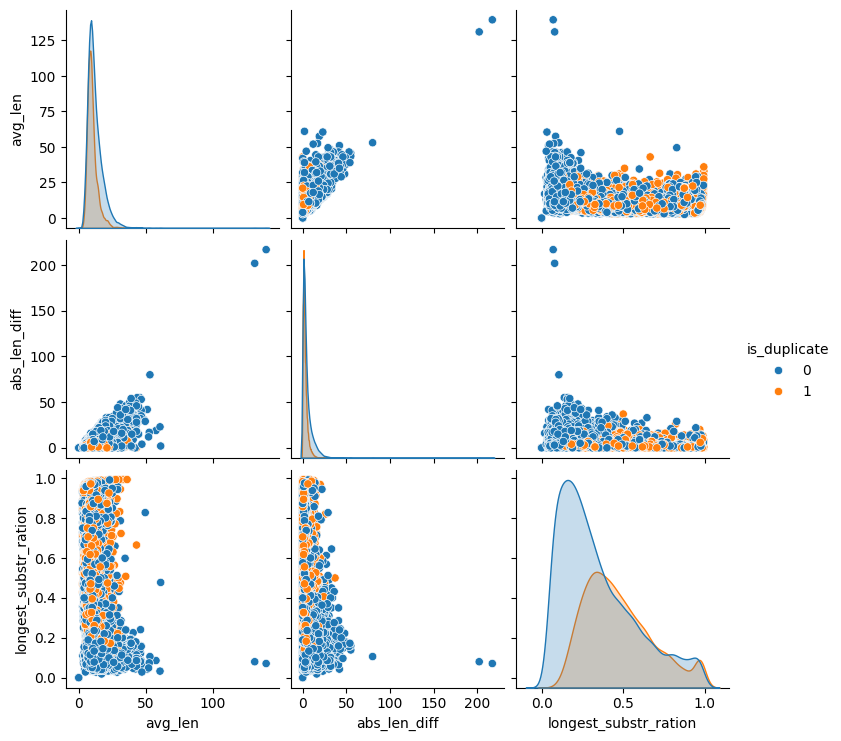

In [ ]:
sns.pairplot(df[['avg_len','abs_len_diff','longest_substr_ration','is_duplicate']],hue='is_duplicate')

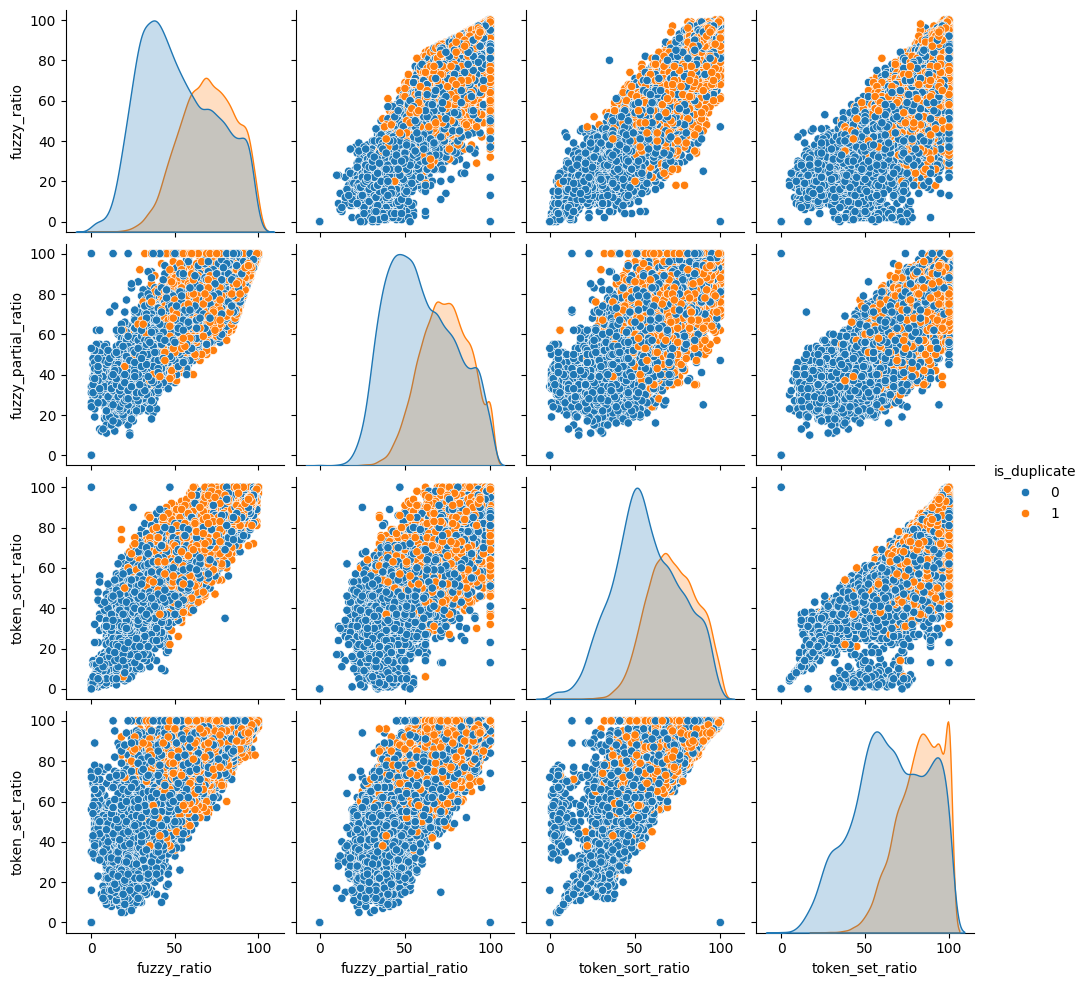

In [ ]:
sns.pairplot(df[['fuzzy_ratio','fuzzy_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [ ]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
10281,when will a custom rom be released for the mot...,need help to plan north india trip on year end...
2186,what matters at the end most,what matters at the end of the day week mont...
29495,what is the current public perception of the c...,how do the chinese view the cultural revolution
48369,how do you make an llc,how can i set up an llc
47148,what is a suitable inpatient drug and alcohol ...,which is a suitable inpatient drug and alcohol...


In [ ]:
final_df = df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,avg_len,longest_substr_ration,fuzzy_ratio,fuzzy_partial_ratio,token_sort_ratio,token_set_ratio
10281,0,57,143,12,29,0,40,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,20.5,0.051724,23,33,17,18
2186,1,28,62,6,13,5,19,0.26,2.499875,0.714276,...,0.384612,0.0,1.0,7.0,9.5,0.827586,60,93,62,90
29495,1,85,47,13,8,4,19,0.21,0.999975,0.499994,...,0.307690,0.0,0.0,5.0,10.5,0.500000,55,57,61,84
48369,1,22,23,6,7,3,13,0.23,1.499925,1.499925,...,0.428565,1.0,1.0,1.0,6.5,0.304348,58,55,67,67
47148,0,80,80,14,14,12,28,0.43,1.199988,1.199988,...,0.857137,1.0,0.0,0.0,14.0,0.740741,90,90,89,92


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
question = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer()
q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2],axis=1)
temp_df.shape

In [ ]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
# separating the features and target
x = final_df.frop(columns = ['is_duplicate'],axis=1)
y = final_df['is_duplicate']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred2 = xgb.predict(x_test)
accuracy_score(y_test,y_pred2)